In [28]:
import drops, utilities, wave_reflection, vertical, constants
import pleasy
from scipy.optimize import fsolve
%matplotlib notebook

Impact: 0.017741774177417742
3.56932844846e-09 0.144508178393 BOUNCE CONDITIONS
Impact: 0.05680568056805681
4.98080458598e-07 0.11557735047 BOUNCE CONDITIONS
Impact: 0.08816881688168818
4.64831293314e-07 0.145115652073 BOUNCE CONDITIONS


<IPython.core.display.Javascript object>


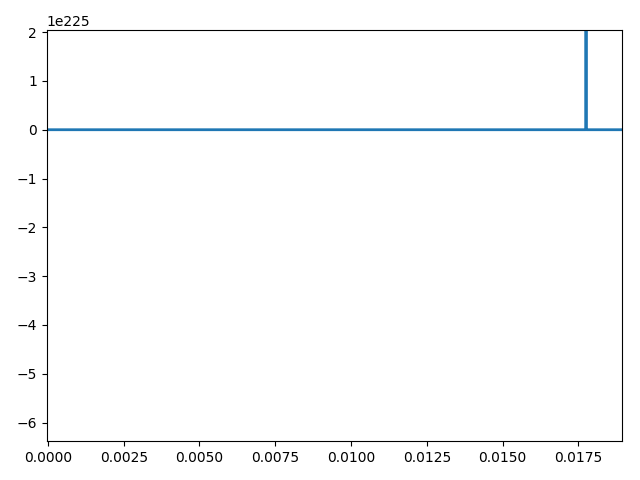

In [153]:
t = linspace(0, .1, 10000)

soln, impacts = drops.ode_standalone(t, corral=False)

z = soln[:, 0, 2]

pleasy.plot(t, z)


c:\users\david\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


<IPython.core.display.Javascript object>


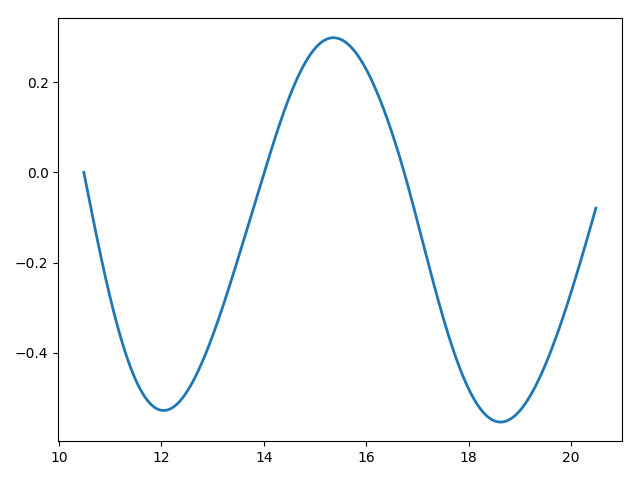

<IPython.core.display.Javascript object>


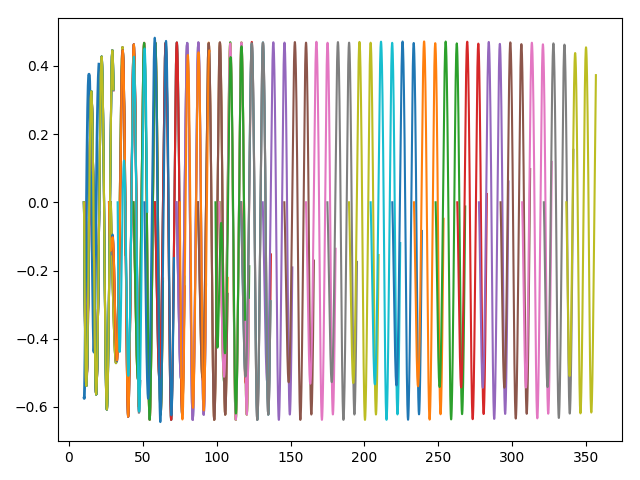

[-0.5742 -0.5742 -0.5742 ...,  0.4049  0.4049  0.405 ] af
(16.74044908052632, -1.6062273744386933e-05, -0.39764815340370224)


In [123]:
# Demonstrate the logarithmic spring model of the drop's vertical motion during contact with the bath.
# t = linspace(0, 10, 1000)
# τ_ = t * drops.ω_D

τ_ = linspace(0, 6, 1e4)
τ_ = contact_τ

# soln2 = vertical.log_spring(τ_, -.17)
soln2 = vertical.log_spring(contact_τ, vz)

Z, v = soln2[:, 0], soln2[:, 1]

pleasy.plot(τ_, Z)
pleasy.plot(τ_, v)

exit = vertical.find_exit_conditions(τ_, soln2)
print(exit)

<IPython.core.display.Javascript object>


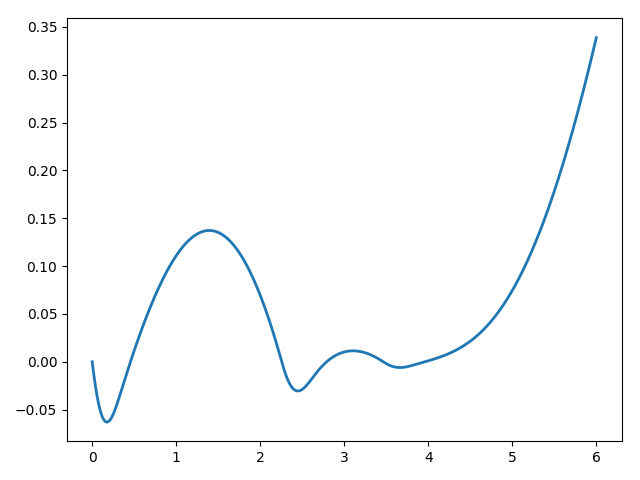

In [17]:
soln3 = vertical.lin_spring(τ_)
pleasy.plot(τ_, soln3[:,0])

<IPython.core.display.Javascript object>


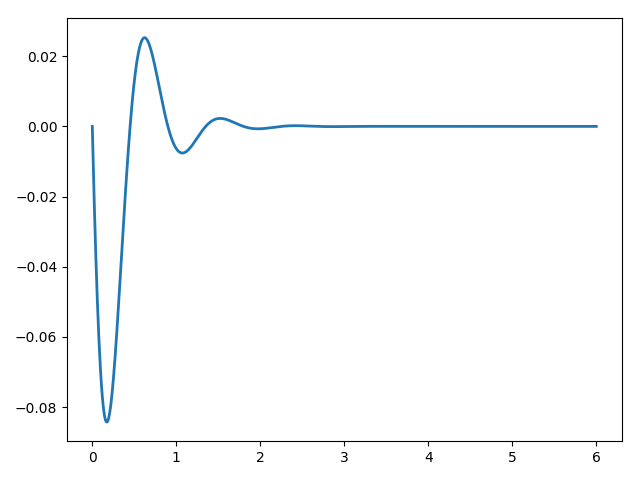

In [47]:
soln4 = vertical.lin_spring_analytic(τ_)

pleasy.plot(τ_, soln4)

(-114, 114) (-114, 114)


<IPython.core.display.Javascript object>


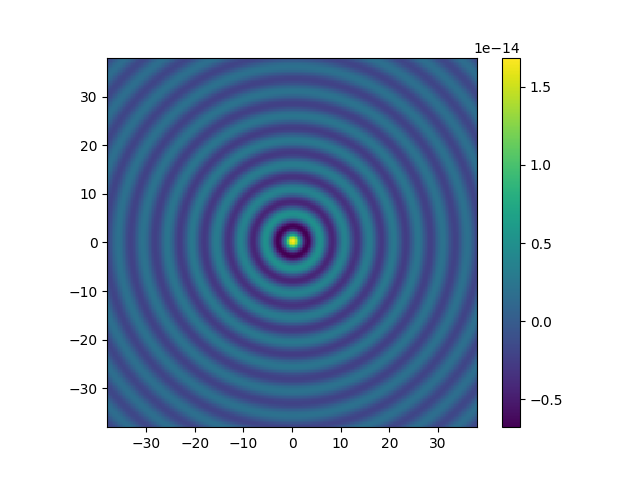

<IPython.core.display.Javascript object>


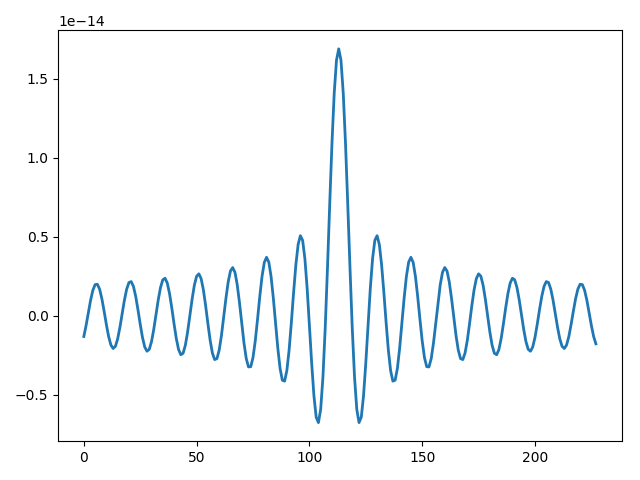

In [20]:
imp = drops.Impact(0., 0., 0., 5.)

# utilities.wave_field(.1, [imp], resolution=3, corral=False)


a = utilities.wave_field(.1, [imp], resolution=3, plot=True, corral=False)


pleasy.plot(a[:, int(a.shape[1]/2)])

In [11]:
soln = drops.vertical(1, 2, 3)
pleasy.plot(soln[:, 0])

AttributeError: module 'drops' has no attribute 'vertical'